In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import datetime as dt
import seaborn as sns

In [2]:
q1 = pd.DataFrame(pd.read_excel("Q1.xlsx"))
q1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [3]:
q2 = pd.DataFrame(pd.read_excel("Q2.xlsx"))

In [4]:
q3 = pd.DataFrame(pd.read_excel("Q3.xlsx"))

In [5]:
q1_t = q1.count()

In [6]:
q1_t

tripduration               66701
starttime                  66701
stoptime                   66701
start station id           66701
start station name         66701
start station latitude     66701
start station longitude    66701
end station id             66701
end station name           66701
end station latitude       66701
end station longitude      66701
bikeid                     66701
usertype                   66701
birth year                 66701
gender                     66701
dtype: int64

In [7]:
q2_t = q2.count()
q2_t

tripduration               71266
starttime                  71266
stoptime                   71266
start station id           71266
start station name         71266
start station latitude     71266
start station longitude    71266
end station id             71266
end station name           71266
end station latitude       71266
end station longitude      71266
bikeid                     71266
usertype                   71266
birth year                 71266
gender                     71266
dtype: int64

In [8]:
q3_t = q3.count()
q3_t

tripduration               135780
starttime                  135780
stoptime                   135780
start station id           135780
start station name         135780
start station latitude     135780
start station longitude    135780
end station id             135780
end station name           135780
end station latitude       135780
end station longitude      135780
bikeid                     135780
usertype                   135780
birth year                 135780
gender                     135780
dtype: int64

In [9]:
#Above result shows us no of records we have each quarter, we can use this as no of trips. we can use any column to define this 
#Total Number of Trips in each quarter:

In [10]:
q1_total = q1.count()["tripduration"]
q1_total

66701

In [11]:
q2_total = q2.count()["tripduration"]
q3_total = q3.count()["tripduration"]
yr_total = q1_total + q2_total + q3_total
to_total_trips_df = pd.DataFrame({"Qtr1" : q1_total,"Qtr2" : q2_total, "Qtr3" : q3_total,
                                  "Year Total" : yr_total}, index=[0])
to_total_trips_df

,Qtr1,Qtr2,Qtr3,Year Total
0,66701,71266,135780,273747


In [12]:
to_total_trips_df_transposed = to_total_trips_df.transpose()
to_total_trips_df_transposed = to_total_trips_df_transposed.rename(columns={0:"Total trips each quarter"})
to_total_trips_df_transposed

,Total trips each quarter
Qtr1,66701
Qtr2,71266
Qtr3,135780
Year Total,273747


<Figure size 216x216 with 0 Axes>

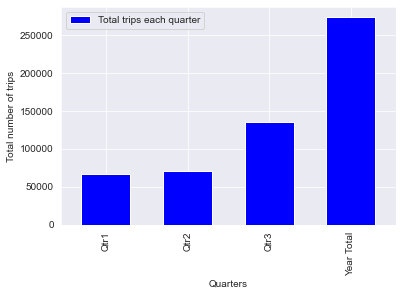

In [161]:
fig = plt.figure(figsize = (3,3))
chart = to_total_trips_df_transposed.plot(kind='bar', color ="blue", width =0.6, align="center")
plt.xlabel("Quarters")
plt.ylabel("Total number of trips")
plt.ticklabel_format(style = "plain", useOffset=False, axis='y')
file = os.path.join("Images","Total trips each quarter.png")
plt.savefig(file, bbox_inches='tight')
plt.show()

In [14]:
# Total Number of trips per station

In [15]:
# Q1
q1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [16]:
station1 = q1["start station id"].astype(str) + " " + q1["start station name"]
q1["Start Station"] = station1
q1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Start Station
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,3186 Grove St PATH
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,3186 Grove St PATH
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,3186 Grove St PATH
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,3195 Sip Ave
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,3186 Grove St PATH


In [17]:
q1_stations = q1.groupby(["Start Station"])
q1_trips = q1_stations["start station id"].count()
q1_stations_df = pd.DataFrame({"Q1 Trips" : q1_trips }).reset_index()
q1_stations_df

,Start Station,Q1 Trips
0,3184 Paulus Hook,1334
1,3185 City Hall,1938
2,3186 Grove St PATH,6763
3,3187 Warren St,1549
4,3191 Union St,197
5,3192 Liberty Light Rail,1611
6,3193 Lincoln Park,465
7,3194 McGinley Square,1434
8,3195 Sip Ave,3783
9,3196 Riverview Park,312


In [18]:
station2 = q2["start station id"].astype(str) + " " + q2["start station name"]
q2["Start Station"] = station2
q2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Start Station
0,1437,2020-04-01 01:06:20.630,2020-04-01 01:30:17.968,3678,Fairmount Ave,40.725726,-74.071959,3678,Fairmount Ave,40.725726,-74.071959,42314,Customer,2002,2,3678 Fairmount Ave
1,264,2020-04-01 05:02:42.057,2020-04-01 05:07:06.126,3207,Oakland Ave,40.737604,-74.052478,3195,Sip Ave,40.730897,-74.063913,42146,Subscriber,1963,2,3207 Oakland Ave
2,254,2020-04-01 06:20:28.119,2020-04-01 06:24:42.138,3678,Fairmount Ave,40.725726,-74.071959,3195,Sip Ave,40.730897,-74.063913,42255,Subscriber,1981,1,3678 Fairmount Ave
3,429,2020-04-01 06:33:30.517,2020-04-01 06:40:40.199,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,42529,Subscriber,1964,1,3195 Sip Ave
4,805,2020-04-01 06:38:32.922,2020-04-01 06:51:58.205,3193,Lincoln Park,40.724605,-74.078406,3195,Sip Ave,40.730897,-74.063913,42362,Subscriber,1965,1,3193 Lincoln Park


In [19]:
q2_stations = q2.groupby(["Start Station"])
q2_trips = q2_stations["start station id"].count()
q2_stations_df = pd.DataFrame({"Q2 Trips" : q2_trips }).reset_index()
q2_stations_df

,Start Station,Q2 Trips
0,3184 Paulus Hook,2111
1,3185 City Hall,2094
2,3186 Grove St PATH,3208
3,3187 Warren St,1815
4,3191 Union St,497
5,3192 Liberty Light Rail,5316
6,3193 Lincoln Park,1465
7,3194 McGinley Square,1048
8,3195 Sip Ave,2147
9,3196 Riverview Park,490


In [20]:
station3 = q3["start station id"].astype(str) + " " + q3["start station name"]
q3["Start Station"] = station3
q3.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Start Station
0,2333,2020-07-01 00:23:19.822,2020-07-01 01:02:13.298,3694,Jackson Square,40.711130,-74.078900,3276,Marin Light Rail,40.714584,-74.042817,42579,Customer,1969,0,3694 Jackson Square
1,1203,2020-07-01 00:27:45.242,2020-07-01 00:47:49.196,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,3202,Newport PATH,40.727224,-74.033759,42564,Subscriber,1965,1,3791 Hoboken Ave at Monmouth St
2,786,2020-07-01 00:34:17.868,2020-07-01 00:47:24.631,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3225,Baldwin at Montgomery,40.723659,-74.064194,42219,Subscriber,1994,1,3792 Columbus Dr at Exchange Pl
3,1488,2020-07-01 00:51:07.531,2020-07-01 01:15:56.020,3677,Glenwood Ave,40.727551,-74.071061,3194,McGinley Square,40.725340,-74.067622,44424,Subscriber,1995,2,3677 Glenwood Ave
4,2682,2020-07-01 00:51:16.388,2020-07-01 01:35:58.459,3191,Union St,40.718211,-74.083639,3193,Lincoln Park,40.724605,-74.078406,42186,Subscriber,1993,1,3191 Union St


In [21]:
q3_stations = q3.groupby(["Start Station"])
q3_trips = q3_stations["start station id"].count()
q3_stations_df = pd.DataFrame({"Q3 Trips" : q3_trips }).reset_index()
q3_stations_df

,Start Station,Q3 Trips
0,3184 Paulus Hook,3280
1,3185 City Hall,3758
2,3186 Grove St PATH,8455
3,3187 Warren St,3838
4,3191 Union St,707
5,3192 Liberty Light Rail,7420
6,3193 Lincoln Park,2705
7,3194 McGinley Square,2154
8,3195 Sip Ave,5028
9,3196 Riverview Park,789


In [22]:
# Summary of Trips

In [23]:
s1 = pd.merge(q1_stations_df, q2_stations_df, on=["Start Station"], how="outer")
s1

,Start Station,Q1 Trips,Q2 Trips
0,3184 Paulus Hook,1334,2111
1,3185 City Hall,1938,2094
2,3186 Grove St PATH,6763,3208
3,3187 Warren St,1549,1815
4,3191 Union St,197,497
5,3192 Liberty Light Rail,1611,5316
6,3193 Lincoln Park,465,1465
7,3194 McGinley Square,1434,1048
8,3195 Sip Ave,3783,2147
9,3196 Riverview Park,312,490


In [24]:
qtr_stations_df = pd.merge(s1, q3_stations_df, on=["Start Station"], how="outer")
qtr_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips
0,3184 Paulus Hook,1334.0,2111.0,3280
1,3185 City Hall,1938.0,2094.0,3758
2,3186 Grove St PATH,6763.0,3208.0,8455
3,3187 Warren St,1549.0,1815.0,3838
4,3191 Union St,197.0,497.0,707
5,3192 Liberty Light Rail,1611.0,5316.0,7420
6,3193 Lincoln Park,465.0,1465.0,2705
7,3194 McGinley Square,1434.0,1048.0,2154
8,3195 Sip Ave,3783.0,2147.0,5028
9,3196 Riverview Park,312.0,490.0,789


In [25]:
qtr_stations_df = qtr_stations_df.fillna(0)

In [26]:
qtr_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips
0,3184 Paulus Hook,1334.0,2111.0,3280
1,3185 City Hall,1938.0,2094.0,3758
2,3186 Grove St PATH,6763.0,3208.0,8455
3,3187 Warren St,1549.0,1815.0,3838
4,3191 Union St,197.0,497.0,707
5,3192 Liberty Light Rail,1611.0,5316.0,7420
6,3193 Lincoln Park,465.0,1465.0,2705
7,3194 McGinley Square,1434.0,1048.0,2154
8,3195 Sip Ave,3783.0,2147.0,5028
9,3196 Riverview Park,312.0,490.0,789


In [27]:
# Top 5% of stations / Top 5 Stations

In [28]:
pct = round(qtr_stations_df.count() * 0.05).astype(int)

In [29]:
q1_top = q1_stations_df.nlargest(pct["Start Station"], 'Q1 Trips')
q2_top = q2_stations_df.nlargest(pct["Start Station"], 'Q2 Trips')
q3_top = q3_stations_df.nlargest(pct["Start Station"], 'Q3 Trips')
q1q2_top = pd.merge(q1_top, q2_top, on='Start Station', how='outer')
top_stations_df = pd.merge(q1q2_top, q3_top, on='Start Station', how='outer')
top_stations_df = top_stations_df.fillna(0)
top_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips
0,3186 Grove St PATH,6763.0,3208.0,8455.0
1,3195 Sip Ave,3783.0,0.0,0.0
2,3203 Hamilton Park,3439.0,0.0,0.0
3,3192 Liberty Light Rail,0.0,5316.0,7420.0
4,3199 Newport Pkwy,0.0,5015.0,9100.0


In [30]:
# extra results

In [31]:
q1_top

,Start Station,Q1 Trips
2,3186 Grove St PATH,6763
8,3195 Sip Ave,3783
14,3203 Hamilton Park,3439


In [32]:
q2_top

,Start Station,Q2 Trips
5,3192 Liberty Light Rail,5316
11,3199 Newport Pkwy,5015
2,3186 Grove St PATH,3208


In [33]:
q3_top

,Start Station,Q3 Trips
11,3199 Newport Pkwy,9100
2,3186 Grove St PATH,8455
5,3192 Liberty Light Rail,7420


In [34]:
q1q2_top

,Start Station,Q1 Trips,Q2 Trips
0,3186 Grove St PATH,6763.0,3208.0
1,3195 Sip Ave,3783.0,NaN
2,3203 Hamilton Park,3439.0,NaN
3,3192 Liberty Light Rail,NaN,5316.0
4,3199 Newport Pkwy,NaN,5015.0


In [35]:
# Bottom 5% stations / Bottom 5 Stations

In [36]:
q1_bottom = q1_stations_df.nsmallest(pct["Start Station"], 'Q1 Trips')
q2_bottom = q2_stations_df.nsmallest(pct["Start Station"], 'Q2 Trips')
q3_bottom = q3_stations_df.nsmallest(pct["Start Station"], 'Q3 Trips')
q1q2_bottom = pd.merge(q1_bottom, q2_bottom, on='Start Station', how='outer')
bottom_stations_df = pd.merge(q1q2_bottom, q3_bottom, on='Start Station', how='outer')
bottom_stations_df = bottom_stations_df.fillna(0)
bottom_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips
0,3191 Union St,197.0,0.0,0.0
1,3277 Communipaw & Berry Lane,204.0,0.0,0.0
2,3281 Leonard Gordon Park,237.0,268.0,482.0
3,3220 5 Corners Library,0.0,338.0,0.0
4,3212 Christ Hospital,0.0,371.0,554.0
5,3426 JCBS Depot,0.0,0.0,1.0


In [37]:
# extra results

In [38]:
q1_bottom

,Start Station,Q1 Trips
4,3191 Union St,197
34,3277 Communipaw & Berry Lane,204
38,3281 Leonard Gordon Park,237


In [39]:
q2_bottom

,Start Station,Q2 Trips
38,3281 Leonard Gordon Park,268
24,3220 5 Corners Library,338
21,3212 Christ Hospital,371


In [40]:
q3_bottom

,Start Station,Q3 Trips
39,3426 JCBS Depot,1
38,3281 Leonard Gordon Park,482
21,3212 Christ Hospital,554


In [41]:
q1q2_bottom

,Start Station,Q1 Trips,Q2 Trips
0,3191 Union St,197.0,NaN
1,3277 Communipaw & Berry Lane,204.0,NaN
2,3281 Leonard Gordon Park,237.0,268.0
3,3220 5 Corners Library,NaN,338.0
4,3212 Christ Hospital,NaN,371.0


In [42]:
sample_df = top_stations_df
stations = sample_df['Start Station']
stations

0         3186 Grove St PATH
1               3195 Sip Ave
2         3203 Hamilton Park
3    3192 Liberty Light Rail
4          3199 Newport Pkwy
Name: Start Station, dtype: object

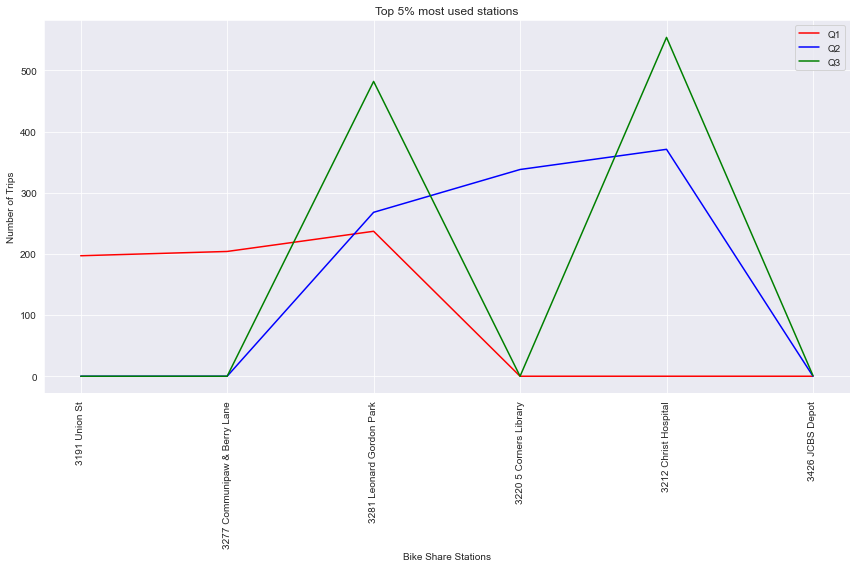

In [162]:
q1trip = sample_df['Q1 Trips']
q2trip = sample_df['Q2 Trips']
q3trip = sample_df['Q3 Trips']

x_axis = np.arange(0,len(sample_df))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)
labels = []

for x in stations:
    labels.append(x)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(tick_locations, labels, rotation='vertical')
plt.title("Top 5% most used stations")
plt.ylabel("Number of Trips")
plt.xlabel("Bike Share Stations")

plt.plot(stations, q1trip, color='red', label='Q1')
plt.plot(stations, q2trip, color='blue', label='Q2')
plt.plot(stations, q3trip, color='green', label='Q3')
plt.legend(loc='best')
plt.tight_layout()
file = os.path.join("Images","Top_5pct_stations.png")
plt.savefig(file, bbox_inches='tight')

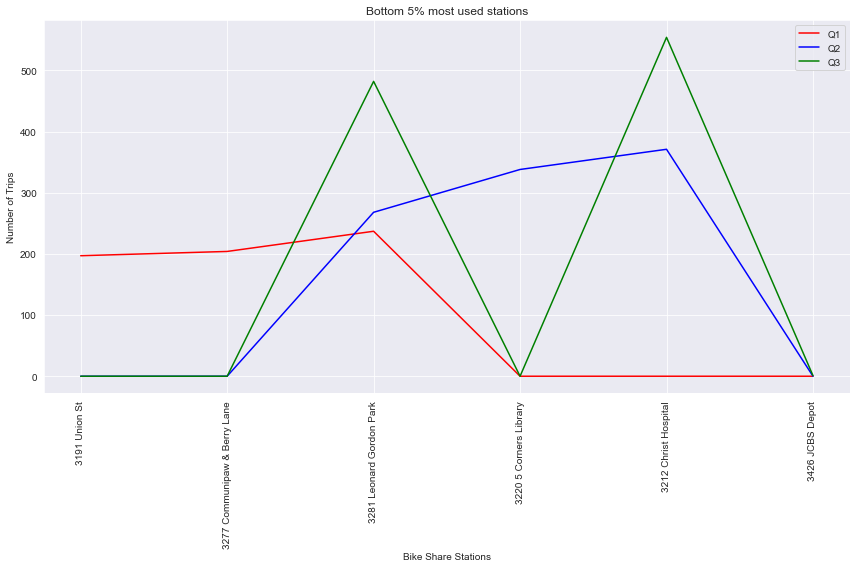

In [163]:
sample_df = bottom_stations_df
stations = sample_df['Start Station']
q1trip = sample_df['Q1 Trips']
q2trip = sample_df['Q2 Trips']
q3trip = sample_df['Q3 Trips']

x_axis = np.arange(0,len(sample_df))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)
labels = []

for x in stations:
    labels.append(x)
    
fig, ax = plt.subplots(figsize=(12,8))
plt.xticks(tick_locations, labels, rotation='vertical')
plt.title("Bottom 5% most used stations")
plt.ylabel("Number of Trips")
plt.xlabel("Bike Share Stations")

plt.plot(stations, q1trip, color='red', label='Q1')
plt.plot(stations, q2trip, color='blue', label='Q2')
plt.plot(stations, q3trip, color='green', label='Q3')
plt.legend(loc='best')
plt.tight_layout()
file = os.path.join("Images","Bottom_stations.png")
plt.savefig(file, bbox_inches='tight')

In [45]:
# Busiest / popular station

In [46]:
q1_popular_df = q1_stations_df.loc[q1_stations_df["Q1 Trips"] == q1_stations_df.iloc[:,1].max()]
q1_popular_df

,Start Station,Q1 Trips
2,3186 Grove St PATH,6763


In [47]:
q2_popular_df = q2_stations_df.loc[q2_stations_df["Q2 Trips"] == q2_stations_df.iloc[:,1].max()]
q2_popular_df

,Start Station,Q2 Trips
5,3192 Liberty Light Rail,5316


In [48]:
q3_popular_df = q3_stations_df.loc[q3_stations_df["Q3 Trips"] == q3_stations_df.iloc[:,1].max()]
q3_popular_df

,Start Station,Q3 Trips
11,3199 Newport Pkwy,9100


In [49]:
q1_popular_df = q1_popular_df.rename(columns={"Q1 Trips" : "Trips"})
q2_popular_df = q2_popular_df.rename(columns={"Q2 Trips" : "Trips"})
q3_popular_df = q3_popular_df.rename(columns={"Q3 Trips" : "Trips"})

In [50]:
a = q1_popular_df.index = ['Q1']
b = q2_popular_df.index = ['Q2']
c = q3_popular_df.index = ['Q3']

In [51]:
x = q1_popular_df.append(q2_popular_df)

In [52]:
popular_stn = x.append(q3_popular_df)
popular_stn

,Start Station,Trips
Q1,3186 Grove St PATH,6763
Q2,3192 Liberty Light Rail,5316
Q3,3199 Newport Pkwy,9100


In [165]:
# Ploting of popular station of each quarter

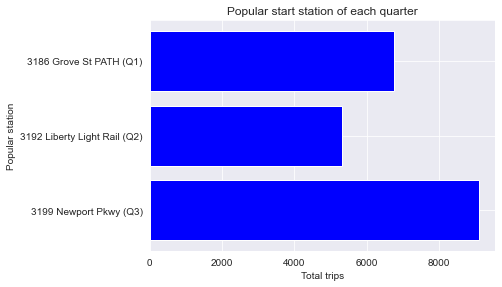

In [169]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
start_station =["3186 Grove St PATH (Q1)", "3192 Liberty Light Rail (Q2)","3199 Newport Pkwy (Q3)"]
y_axis = popular_stn["Trips"]
ax.barh(start_station,y_axis, color = "blue")
ax.set_xlabel('Total trips')
ax.set_title('Popular start station of each quarter')
ax.set_ylabel("Popular station")
ax.invert_yaxis() 

#Save the file as .jpeg format
file = os.path.join("Images","Popular start station of each quarter.jpeg")
plt.savefig(file, bbox_inches='tight')
plt.show()

In [55]:
# Summary statistics table on trip duration (quarterly)

In [56]:
q1_agg = q1["tripduration"].describe()
q1_agg

count    6.670100e+04
mean     8.079635e+02
std      1.514403e+04
min      6.100000e+01
25%      2.310000e+02
50%      3.460000e+02
75%      5.680000e+02
max      1.930668e+06
Name: tripduration, dtype: float64

In [57]:
q2_agg = q2["tripduration"].describe()
q2_agg

count    7.126600e+04
mean     2.284965e+03
std      1.539826e+04
min      6.100000e+01
25%      4.960000e+02
50%      1.091000e+03
75%      2.144000e+03
max      1.554397e+06
Name: tripduration, dtype: float64

In [58]:
q3_agg = q3["tripduration"].describe()
q3_agg

count    1.357800e+05
mean     1.695070e+03
std      2.032869e+04
min      6.100000e+01
25%      3.820000e+02
50%      7.280000e+02
75%      1.605000e+03
max      3.261756e+06
Name: tripduration, dtype: float64

In [59]:
q1_agg_df = pd.DataFrame({"Count" : q1_agg['count'], "Mean": q1_agg['mean'], "Std Dev" : q1_agg['std'],
                          "Min" : q1_agg['min'], "Max" : q1_agg['max']}, index=["Q1"])
q1_agg_df

,Count,Mean,Std Dev,Min,Max
Q1,66701.0,807.963464,15144.032375,61.0,1930668.0


In [60]:
q2_agg_df = pd.DataFrame({"Count" : q2_agg['count'], "Mean": q2_agg['mean'],  "Std Dev" : q2_agg['std'],
                          "Min" : q2_agg['min'], "Max" : q2_agg['max']}, index=["Q2"])
q2_agg_df

,Count,Mean,Std Dev,Min,Max
Q2,71266.0,2284.965032,15398.2628,61.0,1554397.0


In [61]:
q3_agg_df = pd.DataFrame({"Count" : q3_agg['count'], "Mean": q3_agg['mean'],  "Std Dev" : q3_agg['std'],
                          "Min" : q3_agg['min'], "Max" : q3_agg['max']}, index=["Q3"])
q3_agg_df

,Count,Mean,Std Dev,Min,Max
Q3,135780.0,1695.069775,20328.690815,61.0,3261756.0


In [62]:
q1q2_agg_df = q1_agg_df.append(q2_agg_df)
agg_df = q1q2_agg_df.append(q3_agg_df)
agg_df

,Count,Mean,Std Dev,Min,Max
Q1,66701.0,807.963464,15144.032375,61.0,1930668.0
Q2,71266.0,2284.965032,15398.262800,61.0,1554397.0
Q3,135780.0,1695.069775,20328.690815,61.0,3261756.0


In [63]:
#Plotting Average trip duration for each quarter

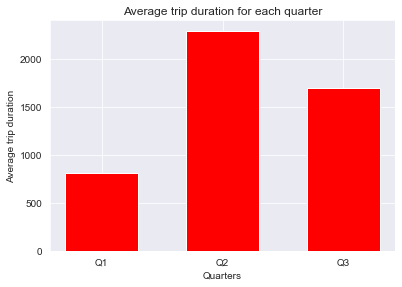

In [170]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
x_axis = ["Q1", "Q2","Q3"]
y_axis = agg_df["Mean"]
ax.bar(x_axis,y_axis,color = "red", width = 0.6)
ax.set_xlabel('Quarters')
ax.set_title('Average trip duration for each quarter')
ax.set_ylabel("Average trip duration")

#Save the file as .png format
file = os.path.join("Images","Average trip duration for each quarter.png")
plt.savefig(file, bbox_inches='tight')
plt.show()

In [65]:
# popular time of the day

In [66]:
bins = [0,2,5,8,11,14,17,20,23]
# create labels for the bins
midnight = "00:00 - 02:59"
three_am = "03:00 - 05:59"
six_am = "06:00 - 08:59"
nine_am = "09:00 - 11:59"
noon = "12:00 - 14:59"
three_pm = "15:00 - 17:59"
six_pm = "18:00 - 20:59"
nine_pm = "21:00 - 23:59"
time_bins =[midnight, three_am, six_am, nine_am, noon, three_pm, six_pm, nine_pm]

In [67]:
q1_start_time_df = q1[["starttime"]]
q1_start_time = pd.to_datetime(q1["starttime"])
q1_start_time

0       2020-01-01 00:04:50.192
1       2020-01-01 00:16:01.670
2       2020-01-01 00:17:33.877
3       2020-01-01 00:32:05.902
4       2020-01-01 00:46:19.678
                  ...          
66696   2020-03-31 22:50:39.041
66697   2020-03-31 23:09:15.969
66698   2020-03-31 23:17:02.024
66699   2020-03-31 23:36:10.643
66700   2020-03-31 23:37:21.184
Name: starttime, Length: 66701, dtype: datetime64[ns]

In [68]:
# get the hour portion and create a data frame
q1_time_started = q1_start_time.dt.hour
q1_time_started_df = pd.DataFrame(q1_time_started)
q1_time_started_df

,starttime
0,0
1,0
2,0
3,0
4,0
...,...
66696,22
66697,23
66698,23
66699,23


In [69]:
# merge hour data to start_time_df
q1_rides_df = q1_start_time_df.merge(q1_time_started_df, left_index=True, right_index=True)
q1_rides_df

,starttime_x,starttime_y
0,2020-01-01 00:04:50.192,0
1,2020-01-01 00:16:01.670,0
2,2020-01-01 00:17:33.877,0
3,2020-01-01 00:32:05.902,0
4,2020-01-01 00:46:19.678,0
...,...,...
66696,2020-03-31 22:50:39.041,22
66697,2020-03-31 23:09:15.969,23
66698,2020-03-31 23:17:02.024,23
66699,2020-03-31 23:36:10.643,23


In [70]:
q1_rides_df = q1_rides_df.rename(columns={"starttime_x" : "Start Time",
                                             "starttime_y" : "Hour"})
q1_rides_df

,Start Time,Hour
0,2020-01-01 00:04:50.192,0
1,2020-01-01 00:16:01.670,0
2,2020-01-01 00:17:33.877,0
3,2020-01-01 00:32:05.902,0
4,2020-01-01 00:46:19.678,0
...,...,...
66696,2020-03-31 22:50:39.041,22
66697,2020-03-31 23:09:15.969,23
66698,2020-03-31 23:17:02.024,23
66699,2020-03-31 23:36:10.643,23


In [71]:
#slice the data and place it into bins
q1_rides_df["Time Group"] = pd.cut(q1_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)
q1_rides_df

,Start Time,Hour,Time Group
0,2020-01-01 00:04:50.192,0,00:00 - 02:59
1,2020-01-01 00:16:01.670,0,00:00 - 02:59
2,2020-01-01 00:17:33.877,0,00:00 - 02:59
3,2020-01-01 00:32:05.902,0,00:00 - 02:59
4,2020-01-01 00:46:19.678,0,00:00 - 02:59
...,...,...,...
66696,2020-03-31 22:50:39.041,22,21:00 - 23:59
66697,2020-03-31 23:09:15.969,23,21:00 - 23:59
66698,2020-03-31 23:17:02.024,23,21:00 - 23:59
66699,2020-03-31 23:36:10.643,23,21:00 - 23:59


In [72]:
q1_rides = q1_rides_df["Time Group"].value_counts()
q1_rides

15:00 - 17:59    14881
18:00 - 20:59    13887
06:00 - 08:59    13814
12:00 - 14:59     9487
09:00 - 11:59     9402
21:00 - 23:59     3588
03:00 - 05:59      866
00:00 - 02:59      776
Name: Time Group, dtype: int64

In [73]:
q1_rides = q1_rides.sort_index()
q1_rides

00:00 - 02:59      776
03:00 - 05:59      866
06:00 - 08:59    13814
09:00 - 11:59     9402
12:00 - 14:59     9487
15:00 - 17:59    14881
18:00 - 20:59    13887
21:00 - 23:59     3588
Name: Time Group, dtype: int64

In [74]:
#get the percentage of riders per time group
q1_pcts = (q1_rides / q1_total * 100).map("{:.2f}%".format)
q1_pcts

00:00 - 02:59     1.16%
03:00 - 05:59     1.30%
06:00 - 08:59    20.71%
09:00 - 11:59    14.10%
12:00 - 14:59    14.22%
15:00 - 17:59    22.31%
18:00 - 20:59    20.82%
21:00 - 23:59     5.38%
Name: Time Group, dtype: object

In [75]:
# create summary data frame to hold results
q1_hour_bin_df = pd.DataFrame({"Total Rides" : q1_rides, "Pct (%) of Rides" : q1_pcts})
q1_hour_bin_df

,Total Rides,Pct (%) of Rides
00:00 - 02:59,776,1.16%
03:00 - 05:59,866,1.30%
06:00 - 08:59,13814,20.71%
09:00 - 11:59,9402,14.10%
12:00 - 14:59,9487,14.22%
15:00 - 17:59,14881,22.31%
18:00 - 20:59,13887,20.82%
21:00 - 23:59,3588,5.38%


In [76]:
#Plotting the most popular time of day in Q1

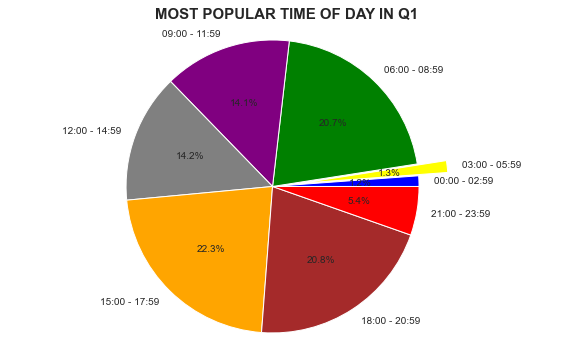

In [171]:
distribution = q1_hour_bin_df["Total Rides"]
time_labels = ["00:00 - 02:59","03:00 - 05:59","06:00 - 08:59",
               "09:00 - 11:59","12:00 - 14:59", "15:00 - 17:59","18:00 - 20:59","21:00 - 23:59"] 
explode = (0, 0.20, 0, 0,0,0,0,0)
colors = ("blue", "yellow","green","purple","grey","orange","brown", "red")
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(distribution, labels=time_labels,explode=explode,colors = colors,
       labeldistance = 1.1,counterclock=True,autopct="%1.1f%%")
plt.axis("equal")
plt.title("MOST POPULAR TIME OF DAY IN Q1", size=15, weight="bold")


#Save the file as .png format
file = os.path.join("Images","Most popular time of day in Q1.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [78]:
# for Q2

In [79]:
q2_start_time_df = q2[["starttime"]]
q2_start_time = pd.to_datetime(q2["starttime"])
q2_start_time

0       2020-04-01 01:06:20.630
1       2020-04-01 05:02:42.057
2       2020-04-01 06:20:28.119
3       2020-04-01 06:33:30.517
4       2020-04-01 06:38:32.922
                  ...          
71261   2020-06-30 23:53:19.738
71262   2020-06-30 23:54:44.010
71263   2020-06-30 23:54:52.192
71264   2020-06-30 23:56:14.665
71265   2020-06-30 23:57:46.149
Name: starttime, Length: 71266, dtype: datetime64[ns]

In [80]:
# get the hour portion and create a data frame
q2_time_started = q2_start_time.dt.hour
q2_time_started_df = pd.DataFrame(q2_time_started)
q2_time_started_df

,starttime
0,1
1,5
2,6
3,6
4,6
...,...
71261,23
71262,23
71263,23
71264,23


In [81]:
# merge hour data to start_time_df
q2_rides_df = q2_start_time_df.merge(q2_time_started_df, left_index=True, right_index=True)
q2_rides_df

,starttime_x,starttime_y
0,2020-04-01 01:06:20.630,1
1,2020-04-01 05:02:42.057,5
2,2020-04-01 06:20:28.119,6
3,2020-04-01 06:33:30.517,6
4,2020-04-01 06:38:32.922,6
...,...,...
71261,2020-06-30 23:53:19.738,23
71262,2020-06-30 23:54:44.010,23
71263,2020-06-30 23:54:52.192,23
71264,2020-06-30 23:56:14.665,23


In [82]:
q2_rides_df = q2_rides_df.rename(columns={"starttime_x" : "Start Time",
                                             "starttime_y" : "Hour"})
q2_rides_df

,Start Time,Hour
0,2020-04-01 01:06:20.630,1
1,2020-04-01 05:02:42.057,5
2,2020-04-01 06:20:28.119,6
3,2020-04-01 06:33:30.517,6
4,2020-04-01 06:38:32.922,6
...,...,...
71261,2020-06-30 23:53:19.738,23
71262,2020-06-30 23:54:44.010,23
71263,2020-06-30 23:54:52.192,23
71264,2020-06-30 23:56:14.665,23


In [83]:
#slice the data and place it into bins
q2_rides_df["Time Group"] = pd.cut(q2_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)
q2_rides_df

,Start Time,Hour,Time Group
0,2020-04-01 01:06:20.630,1,00:00 - 02:59
1,2020-04-01 05:02:42.057,5,03:00 - 05:59
2,2020-04-01 06:20:28.119,6,06:00 - 08:59
3,2020-04-01 06:33:30.517,6,06:00 - 08:59
4,2020-04-01 06:38:32.922,6,06:00 - 08:59
...,...,...,...
71261,2020-06-30 23:53:19.738,23,21:00 - 23:59
71262,2020-06-30 23:54:44.010,23,21:00 - 23:59
71263,2020-06-30 23:54:52.192,23,21:00 - 23:59
71264,2020-06-30 23:56:14.665,23,21:00 - 23:59


In [84]:
#slice the data and place it into bins
q2_rides_df["Time Group"] = pd.cut(q2_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)
q2_rides_df

,Start Time,Hour,Time Group
0,2020-04-01 01:06:20.630,1,00:00 - 02:59
1,2020-04-01 05:02:42.057,5,03:00 - 05:59
2,2020-04-01 06:20:28.119,6,06:00 - 08:59
3,2020-04-01 06:33:30.517,6,06:00 - 08:59
4,2020-04-01 06:38:32.922,6,06:00 - 08:59
...,...,...,...
71261,2020-06-30 23:53:19.738,23,21:00 - 23:59
71262,2020-06-30 23:54:44.010,23,21:00 - 23:59
71263,2020-06-30 23:54:52.192,23,21:00 - 23:59
71264,2020-06-30 23:56:14.665,23,21:00 - 23:59


In [85]:
q2_rides = q2_rides_df["Time Group"].value_counts()
q2_rides

15:00 - 17:59    19637
18:00 - 20:59    17994
12:00 - 14:59    14640
09:00 - 11:59     8037
06:00 - 08:59     4784
21:00 - 23:59     4620
00:00 - 02:59      992
03:00 - 05:59      562
Name: Time Group, dtype: int64

In [86]:
q2_rides = q2_rides.sort_index()
q2_rides

00:00 - 02:59      992
03:00 - 05:59      562
06:00 - 08:59     4784
09:00 - 11:59     8037
12:00 - 14:59    14640
15:00 - 17:59    19637
18:00 - 20:59    17994
21:00 - 23:59     4620
Name: Time Group, dtype: int64

In [87]:
#get the percentage of riders per time group
q2_pcts = (q2_rides / q2_total * 100).map("{:.2f}%".format)
q2_pcts

00:00 - 02:59     1.39%
03:00 - 05:59     0.79%
06:00 - 08:59     6.71%
09:00 - 11:59    11.28%
12:00 - 14:59    20.54%
15:00 - 17:59    27.55%
18:00 - 20:59    25.25%
21:00 - 23:59     6.48%
Name: Time Group, dtype: object

In [88]:
# create summary data frame to hold results
q2_hour_bin_df = pd.DataFrame({"Total Rides" : q2_rides, "Pct (%) of Rides" : q2_pcts})
q2_hour_bin_df

,Total Rides,Pct (%) of Rides
00:00 - 02:59,992,1.39%
03:00 - 05:59,562,0.79%
06:00 - 08:59,4784,6.71%
09:00 - 11:59,8037,11.28%
12:00 - 14:59,14640,20.54%
15:00 - 17:59,19637,27.55%
18:00 - 20:59,17994,25.25%
21:00 - 23:59,4620,6.48%


In [89]:
#Plotting the most popular time of day in Q2

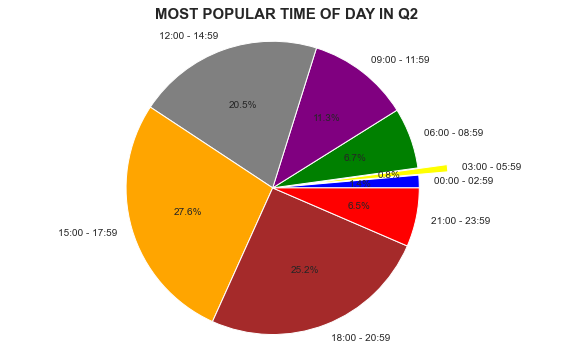

In [172]:
distribution = q2_hour_bin_df["Total Rides"]
time_labels = ["00:00 - 02:59","03:00 - 05:59","06:00 - 08:59",
               "09:00 - 11:59","12:00 - 14:59", "15:00 - 17:59","18:00 - 20:59","21:00 - 23:59"] 
explode = (0, 0.20, 0, 0,0,0,0,0)
colors = ("blue", "yellow","green","purple","grey","orange","brown", "red")
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(distribution, labels=time_labels,explode=explode,colors = colors,
       labeldistance = 1.1,counterclock=True,autopct="%1.1f%%")
plt.axis("equal")
plt.title("MOST POPULAR TIME OF DAY IN Q2", size=15, weight="bold")


#Save the file as .png format
file = os.path.join("Images","Most popular time of day in Q2.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [91]:
# for Q3

In [92]:
q3_start_time_df = q3[["starttime"]]
q3_start_time = pd.to_datetime(q3["starttime"])
q3_start_time

0        2020-07-01 00:23:19.822
1        2020-07-01 00:27:45.242
2        2020-07-01 00:34:17.868
3        2020-07-01 00:51:07.531
4        2020-07-01 00:51:16.388
                   ...          
135775   2020-10-13 15:05:35.086
135776   2020-10-13 15:09:03.489
135777   2020-10-13 15:11:34.350
135778   2020-10-13 15:11:49.151
135779   2020-10-13 15:12:31.792
Name: starttime, Length: 135780, dtype: datetime64[ns]

In [93]:
# get the hour portion and create a data frame
q3_time_started = q3_start_time.dt.hour
q3_time_started_df = pd.DataFrame(q3_time_started)
q3_time_started_df

,starttime
0,0
1,0
2,0
3,0
4,0
...,...
135775,15
135776,15
135777,15
135778,15


In [94]:
# merge hour data to start_time_df
q3_rides_df = q3_start_time_df.merge(q3_time_started_df, left_index=True, right_index=True)
q3_rides_df

,starttime_x,starttime_y
0,2020-07-01 00:23:19.822,0
1,2020-07-01 00:27:45.242,0
2,2020-07-01 00:34:17.868,0
3,2020-07-01 00:51:07.531,0
4,2020-07-01 00:51:16.388,0
...,...,...
135775,2020-10-13 15:05:35.086,15
135776,2020-10-13 15:09:03.489,15
135777,2020-10-13 15:11:34.350,15
135778,2020-10-13 15:11:49.151,15


In [95]:
q3_rides_df = q3_rides_df.rename(columns={"starttime_x" : "Start Time",
                                             "starttime_y" : "Hour"})
q3_rides_df

,Start Time,Hour
0,2020-07-01 00:23:19.822,0
1,2020-07-01 00:27:45.242,0
2,2020-07-01 00:34:17.868,0
3,2020-07-01 00:51:07.531,0
4,2020-07-01 00:51:16.388,0
...,...,...
135775,2020-10-13 15:05:35.086,15
135776,2020-10-13 15:09:03.489,15
135777,2020-10-13 15:11:34.350,15
135778,2020-10-13 15:11:49.151,15


In [96]:
#slice the data and place it into bins
q3_rides_df["Time Group"] = pd.cut(q3_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)
q3_rides_df

,Start Time,Hour,Time Group
0,2020-07-01 00:23:19.822,0,00:00 - 02:59
1,2020-07-01 00:27:45.242,0,00:00 - 02:59
2,2020-07-01 00:34:17.868,0,00:00 - 02:59
3,2020-07-01 00:51:07.531,0,00:00 - 02:59
4,2020-07-01 00:51:16.388,0,00:00 - 02:59
...,...,...,...
135775,2020-10-13 15:05:35.086,15,15:00 - 17:59
135776,2020-10-13 15:09:03.489,15,15:00 - 17:59
135777,2020-10-13 15:11:34.350,15,15:00 - 17:59
135778,2020-10-13 15:11:49.151,15,15:00 - 17:59


In [97]:
q3_rides = q3_rides_df["Time Group"].value_counts()
q3_rides

18:00 - 20:59    35732
15:00 - 17:59    30548
12:00 - 14:59    22376
09:00 - 11:59    17389
06:00 - 08:59    13126
21:00 - 23:59    11912
00:00 - 02:59     3127
03:00 - 05:59     1570
Name: Time Group, dtype: int64

In [98]:
q3_rides = q3_rides.sort_index()
q3_rides

00:00 - 02:59     3127
03:00 - 05:59     1570
06:00 - 08:59    13126
09:00 - 11:59    17389
12:00 - 14:59    22376
15:00 - 17:59    30548
18:00 - 20:59    35732
21:00 - 23:59    11912
Name: Time Group, dtype: int64

In [99]:
#get the percentage of riders per time group
q3_pcts = (q3_rides / q3_total * 100).map("{:.2f}%".format)
q3_pcts

00:00 - 02:59     2.30%
03:00 - 05:59     1.16%
06:00 - 08:59     9.67%
09:00 - 11:59    12.81%
12:00 - 14:59    16.48%
15:00 - 17:59    22.50%
18:00 - 20:59    26.32%
21:00 - 23:59     8.77%
Name: Time Group, dtype: object

In [100]:
# create summary data frame to hold results
q3_hour_bin_df = pd.DataFrame({"Total Rides" : q3_rides, "Pct (%) of Rides" : q3_pcts})
q3_hour_bin_df

,Total Rides,Pct (%) of Rides
00:00 - 02:59,3127,2.30%
03:00 - 05:59,1570,1.16%
06:00 - 08:59,13126,9.67%
09:00 - 11:59,17389,12.81%
12:00 - 14:59,22376,16.48%
15:00 - 17:59,30548,22.50%
18:00 - 20:59,35732,26.32%
21:00 - 23:59,11912,8.77%


In [101]:
#Plotting the most popular time of day in Q3

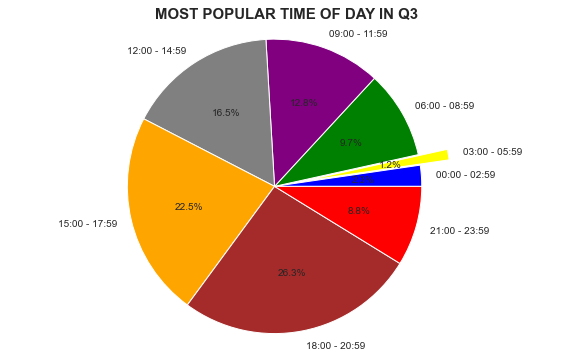

In [173]:
distribution = q3_hour_bin_df["Total Rides"]
time_labels = ["00:00 - 02:59","03:00 - 05:59","06:00 - 08:59",
               "09:00 - 11:59","12:00 - 14:59", "15:00 - 17:59","18:00 - 20:59","21:00 - 23:59"] 
explode = (0, 0.20, 0, 0,0,0,0,0)
colors = ("blue", "yellow","green","purple","grey","orange","brown", "red")
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(distribution, labels=time_labels,explode=explode,colors = colors,
       labeldistance = 1.1,counterclock=True,autopct="%1.1f%%")
plt.axis("equal")
plt.title("MOST POPULAR TIME OF DAY IN Q3", size=15, weight="bold")


#Save the file as .png format
file = os.path.join("Images","Most popular time of day in Q3.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [103]:
# Total number of unique users by quarter

In [104]:
to_q1_user_type = q1[["usertype"]]
to_q1_user_type

,usertype
0,Subscriber
1,Subscriber
2,Customer
3,Customer
4,Subscriber
...,...
66696,Subscriber
66697,Subscriber
66698,Subscriber
66699,Subscriber


In [105]:
to_q1_user_count = q1_total
to_q1_user_count

66701

In [106]:
q1_user_type_df = pd.DataFrame({"Qtr1 Total" : to_q1_user_type["usertype"].value_counts()}).reset_index()
q1_user_type_df

,index,Qtr1 Total
0,Subscriber,61081
1,Customer,5620


In [107]:
q1_user_type_df["Q1 Pct (%)"] = (q1_user_type_df["Qtr1 Total"] / to_q1_user_count) * 100
q1_user_type_df

,index,Qtr1 Total,Q1 Pct (%)
0,Subscriber,61081,91.574339
1,Customer,5620,8.425661


In [108]:
q1_user_type_df["Q1 Pct (%)"] = q1_user_type_df["Q1 Pct (%)"].map("{:.2f}%".format)
q1_user_type_df

,index,Qtr1 Total,Q1 Pct (%)
0,Subscriber,61081,91.57%
1,Customer,5620,8.43%


In [109]:
to_q2_user_type = q2[["usertype"]]
to_q2_user_type

,usertype
0,Customer
1,Subscriber
2,Subscriber
3,Subscriber
4,Subscriber
...,...
71261,Customer
71262,Customer
71263,Customer
71264,Customer


In [110]:
to_q2_user_count = q2_total
to_q2_user_count

71266

In [111]:
q2_user_type_df = pd.DataFrame({"Qtr2 Total" : to_q2_user_type["usertype"].value_counts()}).reset_index()
q2_user_type_df

,index,Qtr2 Total
0,Subscriber,39469
1,Customer,31797


In [112]:
q2_user_type_df["Q2 Pct (%)"] = (q2_user_type_df["Qtr2 Total"] / to_q2_user_count) * 100
q2_user_type_df

,index,Qtr2 Total,Q2 Pct (%)
0,Subscriber,39469,55.382651
1,Customer,31797,44.617349


In [113]:
q2_user_type_df["Q2 Pct (%)"] = q2_user_type_df["Q2 Pct (%)"].map("{:.2f}%".format)
q2_user_type_df

,index,Qtr2 Total,Q2 Pct (%)
0,Subscriber,39469,55.38%
1,Customer,31797,44.62%


In [114]:
to_q3_user_type = q3[["usertype"]]
to_q3_user_type

,usertype
0,Customer
1,Subscriber
2,Subscriber
3,Subscriber
4,Subscriber
...,...
135775,Subscriber
135776,Subscriber
135777,Subscriber
135778,Subscriber


In [115]:
to_q3_user_count = q3_total
to_q3_user_count

135780

In [116]:
q3_user_type_df = pd.DataFrame({"Qtr3 Total" : to_q3_user_type["usertype"].value_counts()}).reset_index()
q3_user_type_df

,index,Qtr3 Total
0,Subscriber,84876
1,Customer,50904


In [117]:
q3_user_type_df["Q3 Pct (%)"] = (q3_user_type_df["Qtr3 Total"] / to_q3_user_count) * 100
q3_user_type_df

,index,Qtr3 Total,Q3 Pct (%)
0,Subscriber,84876,62.509943
1,Customer,50904,37.490057


In [118]:
q3_user_type_df["Q3 Pct (%)"] = q3_user_type_df["Q3 Pct (%)"].map("{:.2f}%".format)
q3_user_type_df

,index,Qtr3 Total,Q3 Pct (%)
0,Subscriber,84876,62.51%
1,Customer,50904,37.49%


In [119]:
# Summary of users by quarter

In [120]:
x = pd.merge(q1_user_type_df,q2_user_type_df, how="inner", on="index")
x

,index,Qtr1 Total,Q1 Pct (%),Qtr2 Total,Q2 Pct (%)
0,Subscriber,61081,91.57%,39469,55.38%
1,Customer,5620,8.43%,31797,44.62%


In [121]:
to_users_type_df = pd.merge(x,q3_user_type_df, how="inner", on="index")
to_users_type_df

,index,Qtr1 Total,Q1 Pct (%),Qtr2 Total,Q2 Pct (%),Qtr3 Total,Q3 Pct (%)
0,Subscriber,61081,91.57%,39469,55.38%,84876,62.51%
1,Customer,5620,8.43%,31797,44.62%,50904,37.49%


In [122]:
to_users_type_df = to_users_type_df.rename(columns={"Qtr1 Total": "Qtr1", "Qtr2 Total" : "Qtr2",
                                                    "Qtr3 Total" : "Qtr3",
                                                     "index" : "User Type"})
to_users_type_df

,User Type,Qtr1,Q1 Pct (%),Qtr2,Q2 Pct (%),Qtr3,Q3 Pct (%)
0,Subscriber,61081,91.57%,39469,55.38%,84876,62.51%
1,Customer,5620,8.43%,31797,44.62%,50904,37.49%


In [123]:
# Total number and percentage of new york Users per Membership Type

In [124]:
to_users_type_df["Total Users"] = to_users_type_df["Qtr1"] + to_users_type_df["Qtr2"] + to_users_type_df["Qtr3"]
to_users_type_df

,User Type,Qtr1,Q1 Pct (%),Qtr2,Q2 Pct (%),Qtr3,Q3 Pct (%),Total Users
0,Subscriber,61081,91.57%,39469,55.38%,84876,62.51%,185426
1,Customer,5620,8.43%,31797,44.62%,50904,37.49%,88321


In [125]:
index1 = to_users_type_df['User Type']
index1

0    Subscriber
1      Customer
Name: User Type, dtype: object

In [126]:
users = to_users_type_df['Total Users']
users

0    185426
1     88321
Name: Total Users, dtype: int64

In [127]:
to_users_df = pd.DataFrame({'User Type': index1, 'Total Users': users})
to_users_df

,User Type,Total Users
0,Subscriber,185426
1,Customer,88321


In [128]:
to_users1_df = to_users_df.set_index('User Type')
to_users1_df

,Total Users
User Type,
Subscriber,185426
Customer,88321


In [129]:
to_total_users = q1_total + q2_total + q3_total
to_total_users

273747

In [130]:
to_users1_df["Pct (%) of Users"] = (to_users1_df[:].astype('int64') / to_total_users) * 100
to_users1_df

,Total Users,Pct (%) of Users
User Type,,
Subscriber,185426,67.736267
Customer,88321,32.263733


In [131]:
# Total Number of trips 

In [132]:
to_total_trips_df

,Qtr1,Qtr2,Qtr3,Year Total
0,66701,71266,135780,273747


In [133]:
#unique number of bikers 
q1_total_Bike = q1["bikeid"].nunique()

q2_total_Bike = q2["bikeid"].nunique()

q3_total_Bike = q3["bikeid"].nunique()


print(f"Unique Bikers for Q1: {q1_total_Bike} | Q2: {q2_total_Bike} | \
Q3: {q3_total_Bike}")

print(q1_total_Bike + q2_total_Bike + q3_total_Bike)

Unique Bikers for Q1: 1019 | Q2: 797 | Q3: 801
2617


In [134]:
newyork = [q1, q2, q3]
bike_share = pd.concat(newyork)
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Start Station
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,3186 Grove St PATH
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,3186 Grove St PATH
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,3186 Grove St PATH
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,3195 Sip Ave
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,3186 Grove St PATH


In [135]:
#Convert the objects into DateTime format:
bike_share['Start Time'] = pd.to_datetime(bike_share['starttime'])
bike_share['End Time'] = pd.to_datetime(bike_share['stoptime'])
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Start Station,Start Time,End Time
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,3186 Grove St PATH,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,3186 Grove St PATH,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,3186 Grove St PATH,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,3195 Sip Ave,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,3186 Grove St PATH,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344


In [136]:
#extract the hour, month and day of the week from both columns:
bike_share['hour_start'] = bike_share['Start Time'].apply(lambda time: time.hour)
bike_share['month_start'] = bike_share['Start Time'].apply(lambda time: time.month)
bike_share['weekday_start'] = bike_share['Start Time'].apply(lambda time: time.dayofweek)
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,Start Station,Start Time,End Time,hour_start,month_start,weekday_start
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,29444,Subscriber,1984,2,3186 Grove St PATH,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,0,1,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,26305,Subscriber,1989,2,3186 Grove St PATH,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,0,1,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,29268,Customer,1989,1,3186 Grove St PATH,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,0,1,2
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,...,29278,Customer,1969,0,3195 Sip Ave,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,0,1,2
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,29276,Subscriber,1983,2,3186 Grove St PATH,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,0,1,2


In [137]:
bike_share['hour_stop'] = bike_share['End Time'].apply(lambda time: time.hour)
bike_share['month_stop'] = bike_share['End Time'].apply(lambda time: time.month)
bike_share['weekday_stop'] = bike_share['End Time'].apply(lambda time: time.dayofweek)
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,Start Station,Start Time,End Time,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,2,3186 Grove St PATH,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,0,1,2,0,1,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,2,3186 Grove St PATH,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,0,1,2,0,1,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,1,3186 Grove St PATH,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,0,1,2,0,1,2
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,...,0,3195 Sip Ave,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,0,1,2,0,1,2
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,2,3186 Grove St PATH,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,0,1,2,0,1,2


In [138]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month_start'] = bike_share['month_start'].map(mon)
bike_share['month_stop'] = bike_share['month_stop'].map(mon)
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,Start Station,Start Time,End Time,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,2,3186 Grove St PATH,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,0,Jan,2,0,Jan,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,2,3186 Grove St PATH,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,0,Jan,2,0,Jan,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,1,3186 Grove St PATH,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,0,Jan,2,0,Jan,2
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,...,0,3195 Sip Ave,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,0,Jan,2,0,Jan,2
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,2,3186 Grove St PATH,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,0,Jan,2,0,Jan,2


In [139]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday_start'] = bike_share['weekday_start'].map(day)
bike_share['weekday_stop'] = bike_share['weekday_stop'].map(day)
bike_share.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,Start Station,Start Time,End Time,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,2,3186 Grove St PATH,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,0,Jan,Wed,0,Jan,Wed
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,2,3186 Grove St PATH,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,0,Jan,Wed,0,Jan,Wed
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,1,3186 Grove St PATH,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,0,Jan,Wed,0,Jan,Wed
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,...,0,3195 Sip Ave,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,0,Jan,Wed,0,Jan,Wed
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,...,2,3186 Grove St PATH,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,0,Jan,Wed,0,Jan,Wed


In [140]:
bike_share.count()

tripduration               273747
starttime                  273747
stoptime                   273747
start station id           273747
start station name         273747
start station latitude     273747
start station longitude    273747
end station id             273747
end station name           273747
end station latitude       273747
end station longitude      273747
bikeid                     273747
usertype                   273747
birth year                 273747
gender                     273747
Start Station              273747
Start Time                 273747
End Time                   273747
hour_start                 273747
month_start                273747
weekday_start              273747
hour_stop                  273747
month_stop                 273747
weekday_stop               273747
dtype: int64

C:\Users\hetsa\anaconda3\envs\PythonData38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


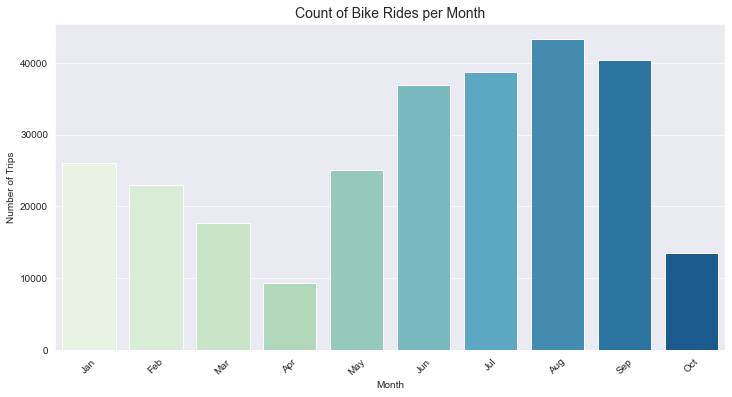

In [174]:
#Count of Bike Rides per Month
plt.figure(figsize=(12,6))

g=sns.countplot(bike_share['month_start'], palette="GnBu")
g.set_title('Count of Bike Rides per Month', fontsize=14)
g.set_xticklabels(bike_share['month_start'].unique(),rotation=45)
g.set_xlabel('Month')
g.set_ylabel('Number of Trips')

# Save Figure
file = os.path.join("Images","Count of Bike Rides per Month.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

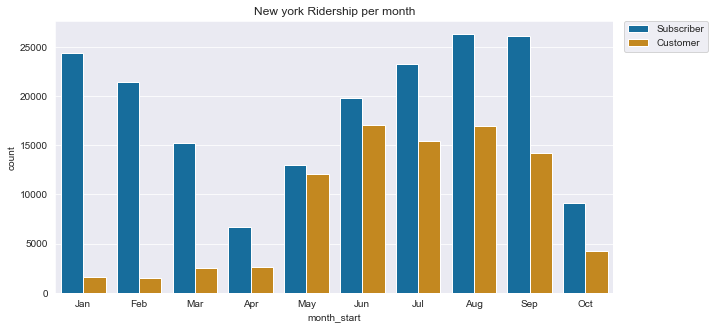

In [175]:
#Ridership per month:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share, x='month_start', hue='usertype', palette='colorblind')
plt.title('New york Ridership per month')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlabel('Month')
g.set_ylabel('Number of Trips')

# Save Figure
file = os.path.join("Images","New york Ridership per month.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [143]:
#DataFrame by the hour and the day of the week

In [144]:
daily_activity = bike_share.groupby(by=['weekday_start','hour_start']).count()['usertype'].unstack()
daily_activity.head()

hour_start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday_start,,,,,,,,,,,,,,,,,,,,,
Fri,346,148,87,65,103,294,918,1755,2344,1573,...,2103,2362,2736,3711,4156,3164,2004,1327,1118,796
Mon,326,171,72,39,104,294,889,1743,2261,1552,...,1812,1982,2450,3567,4111,3333,2055,1205,821,459
Sat,582,328,207,99,81,178,337,709,1300,2119,...,3517,3856,3957,4007,3752,3217,2101,1333,1014,863
Sun,579,357,193,115,72,127,285,523,1062,1711,...,3811,4084,4005,3904,3525,2802,1862,1070,908,524
Thu,301,164,62,51,92,325,1057,2061,2663,1567,...,1733,1857,2343,3906,4652,3384,2157,1317,956,615


In [145]:
#Count of Bike Rides per Week

C:\Users\hetsa\anaconda3\envs\PythonData38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


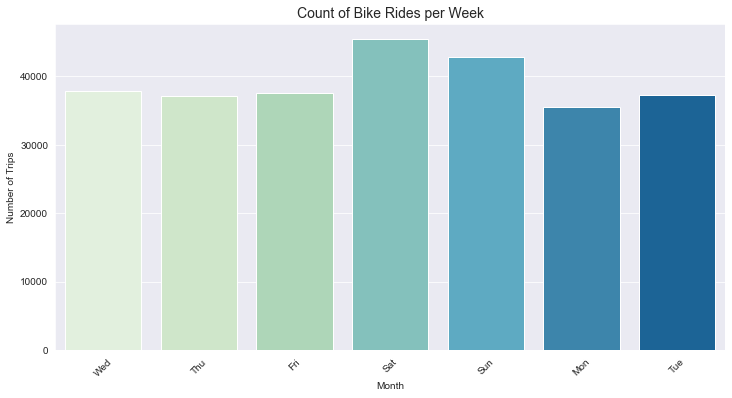

In [176]:
plt.figure(figsize=(12,6))

g=sns.countplot(bike_share['weekday_start'],palette="GnBu")
g.set_title('Count of Bike Rides per Week', fontsize=14)
g.set_xticklabels(bike_share['weekday_start'].unique(),rotation=45)
g.set_xlabel('Month')
g.set_ylabel('Number of Trips')

# Save Figure
file = os.path.join("Images","Count of Bike Rides per Week.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

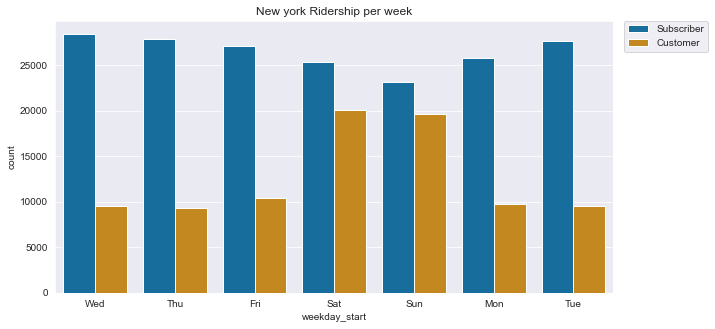

In [177]:
#Ridership per day:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ridership = sns.countplot(data=bike_share, x='weekday_start', hue='usertype', palette='colorblind')
plt.title('New york Ridership per week')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Save Figure
file = os.path.join("Images","New york Ridership per week.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

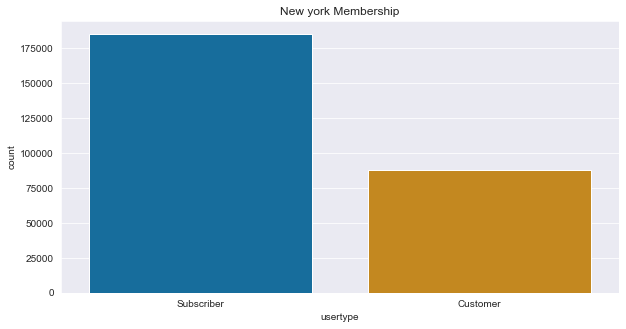

In [178]:
#Bike Share Toronto membership:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='usertype',data=bike_share,palette='colorblind')
plt.title('New york Membership')

# Save Figure
file = os.path.join("Images","New york Membership.png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [149]:
#The top departing stations for Subscribers:

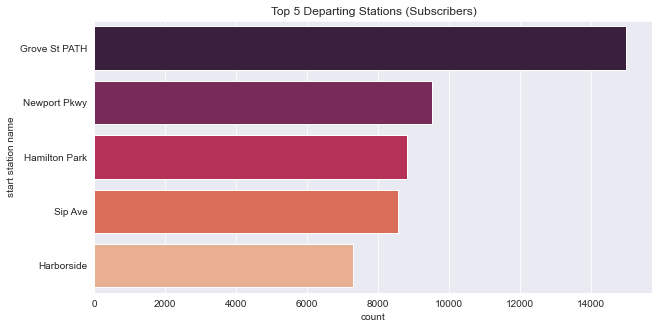

In [179]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['usertype']=='Subscriber']['start station name'],data=bike_share, palette='rocket',order=bike_share[bike_share['usertype']=='Subscriber']['start station name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations (Subscribers)')

# Save Figure
file = os.path.join("Images","Top 5 Departing Stations(Subscribers).png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [151]:
#The top arriving stations for Subscribers:

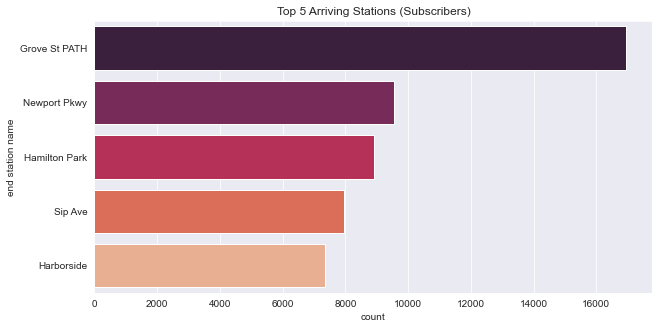

In [180]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['usertype']=='Subscriber']['end station name'],data=bike_share, palette='rocket',order=bike_share[bike_share['usertype']=='Subscriber']['end station name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Subscribers)')

# Save Figure
file = os.path.join("Images","Top 5 Arriving Stations(Subscribers).png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [153]:
#The top departing stations for Customers:

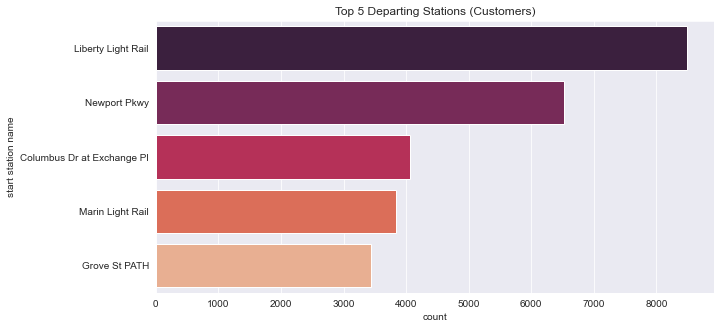

In [181]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['usertype']=='Customer']['start station name'],data=bike_share, palette='rocket',order=bike_share[bike_share['usertype']=='Customer']['start station name'].value_counts().index[:5])
plt.title('Top 5 Departing Stations (Customers)')

# Save Figure
file = os.path.join("Images","Top 5 Departing Stations(Customers).png")
plt.savefig(file, bbox_inches='tight')

plt.show()

In [155]:
#The top arriving stations for Customers:

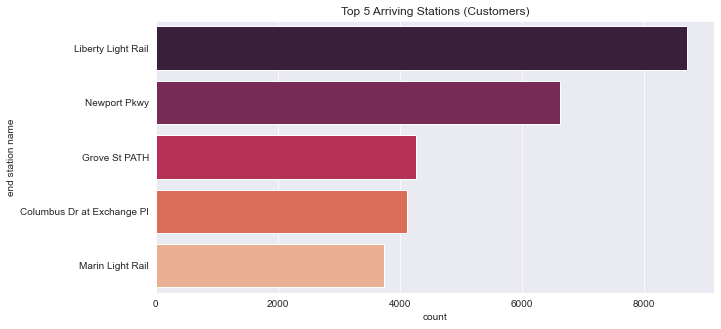

In [183]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(y=bike_share[bike_share['usertype']=='Customer']['end station name'],data=bike_share, palette='rocket',order=bike_share[bike_share['usertype']=='Customer']['end station name'].value_counts().index[:5])
plt.title('Top 5 Arriving Stations (Customers)')

# Save Figure
file = os.path.join("Images","Top 5 Arriving Stations(Customers).jpeg")
plt.savefig(file, bbox_inches='tight')

plt.show()